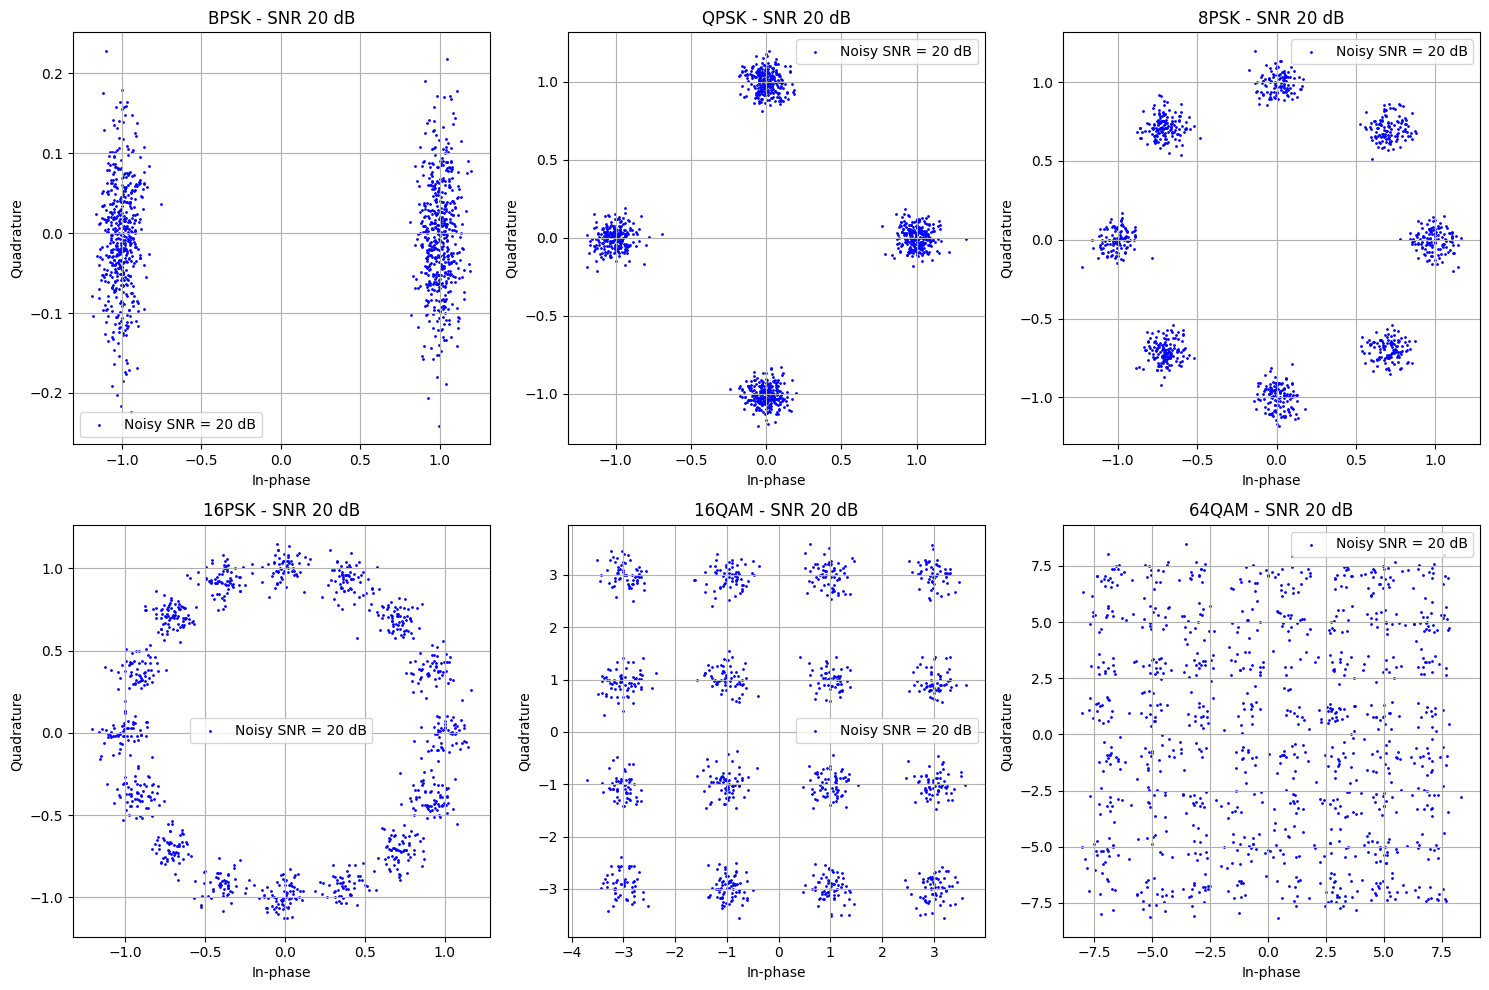

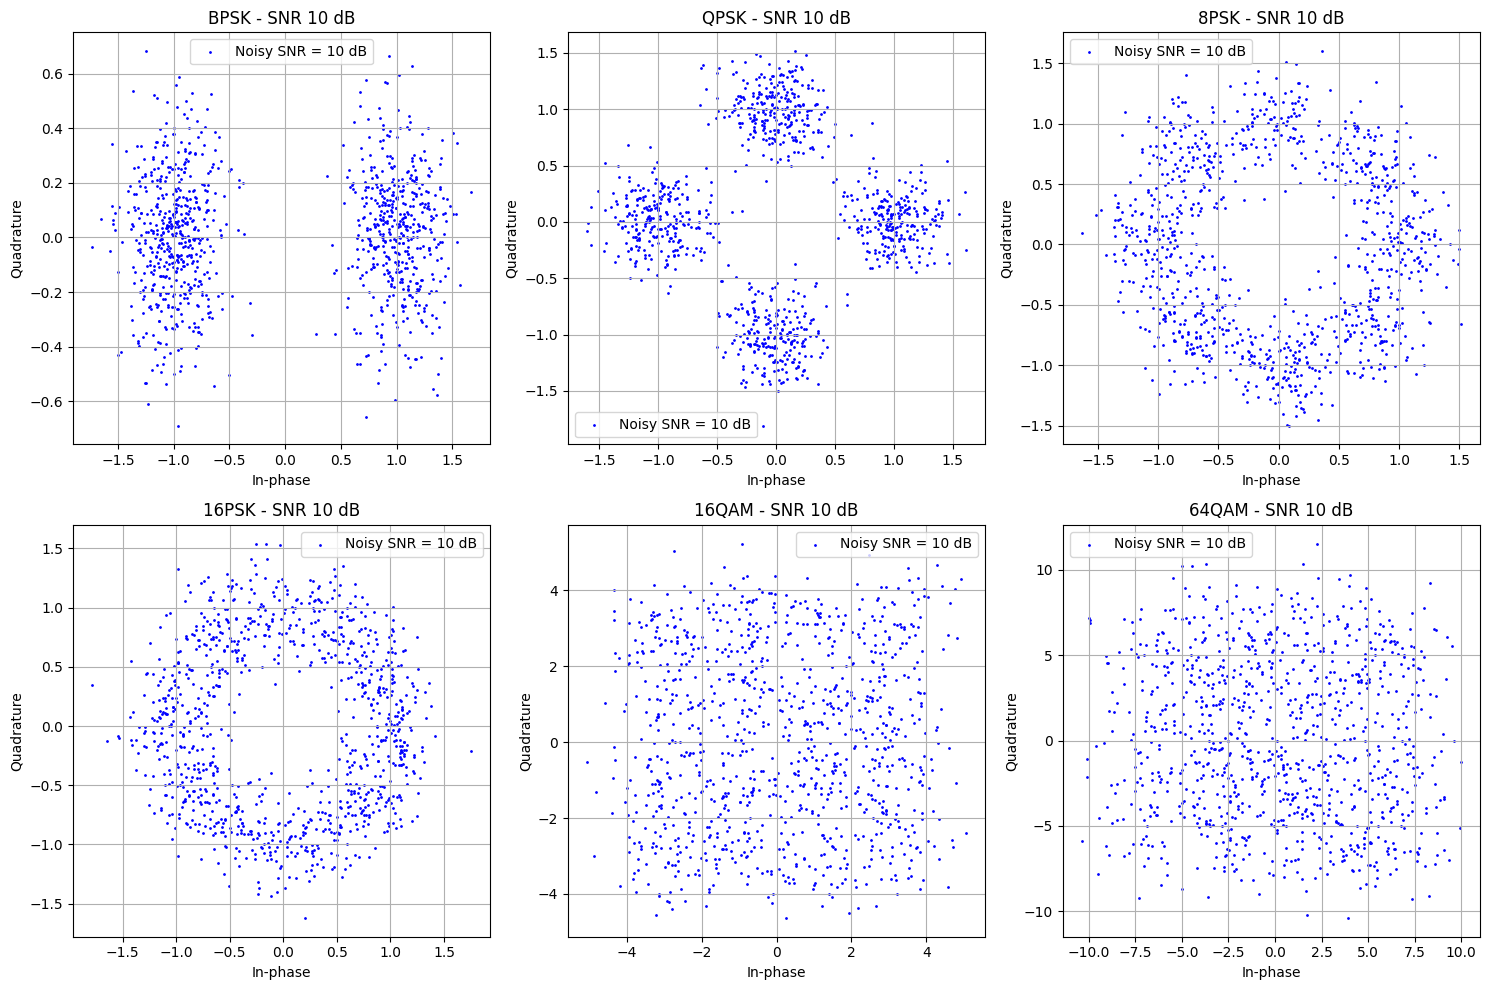

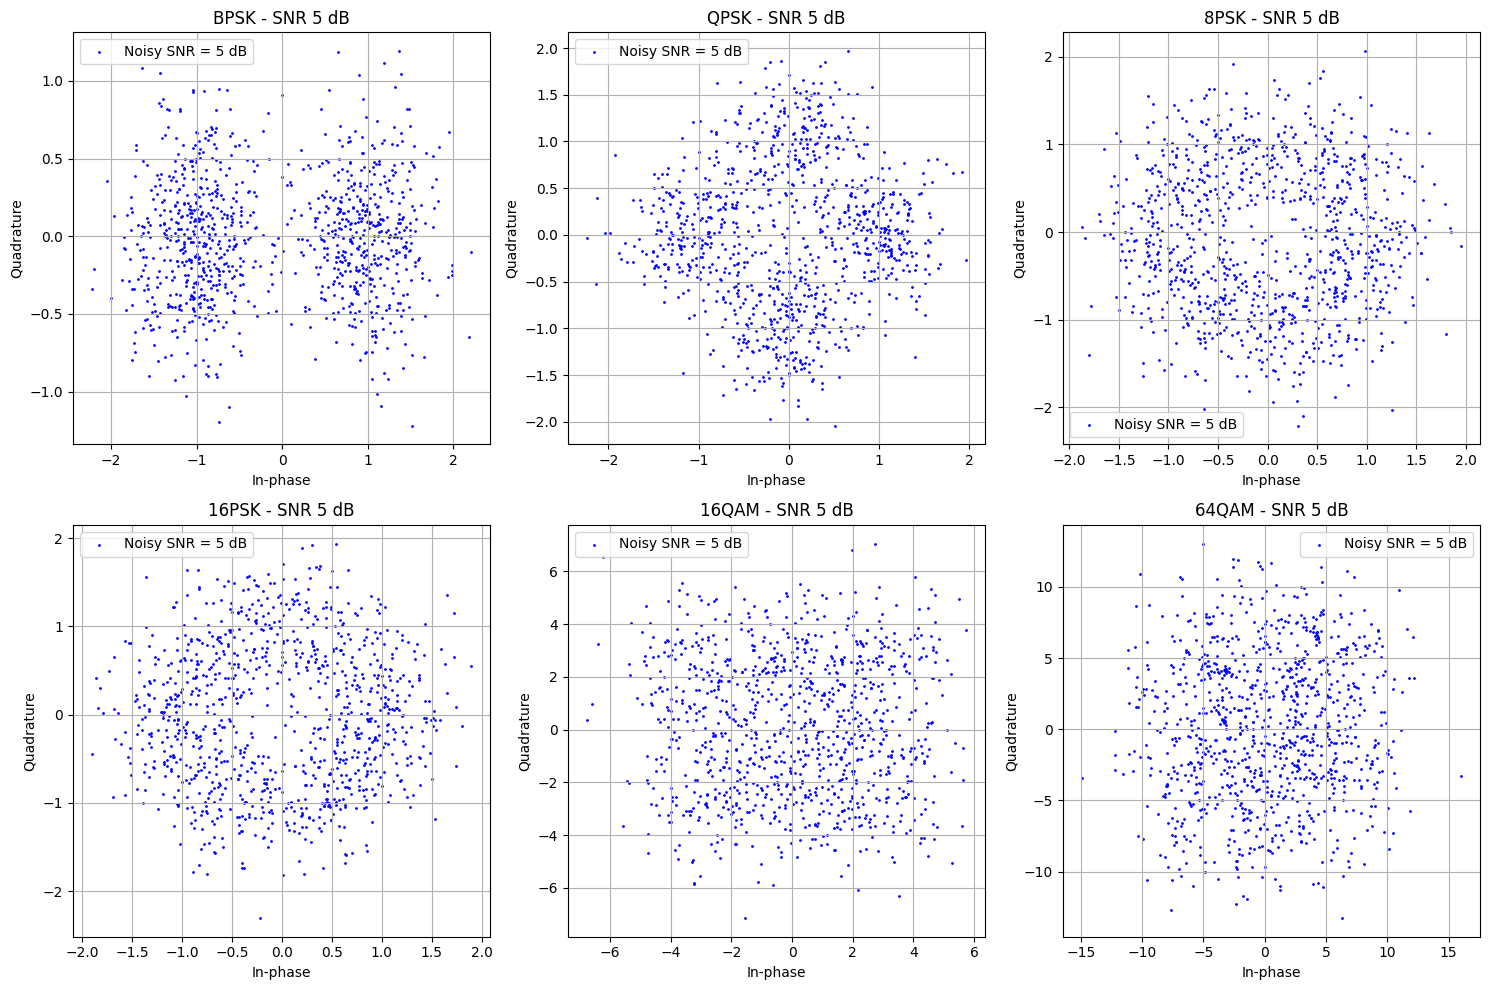

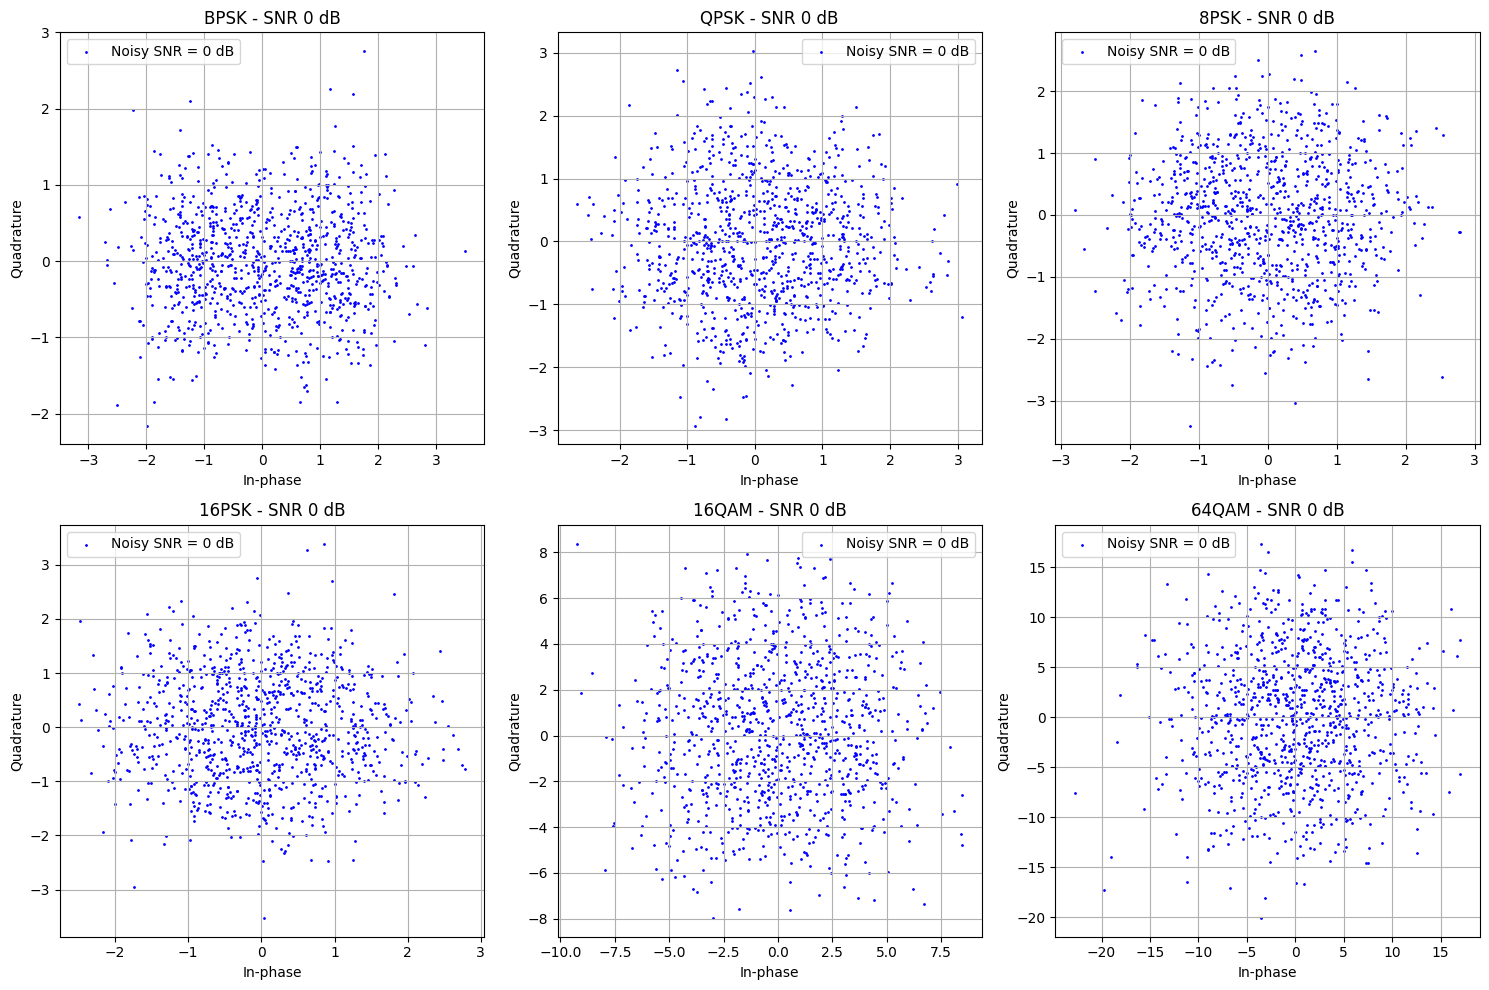

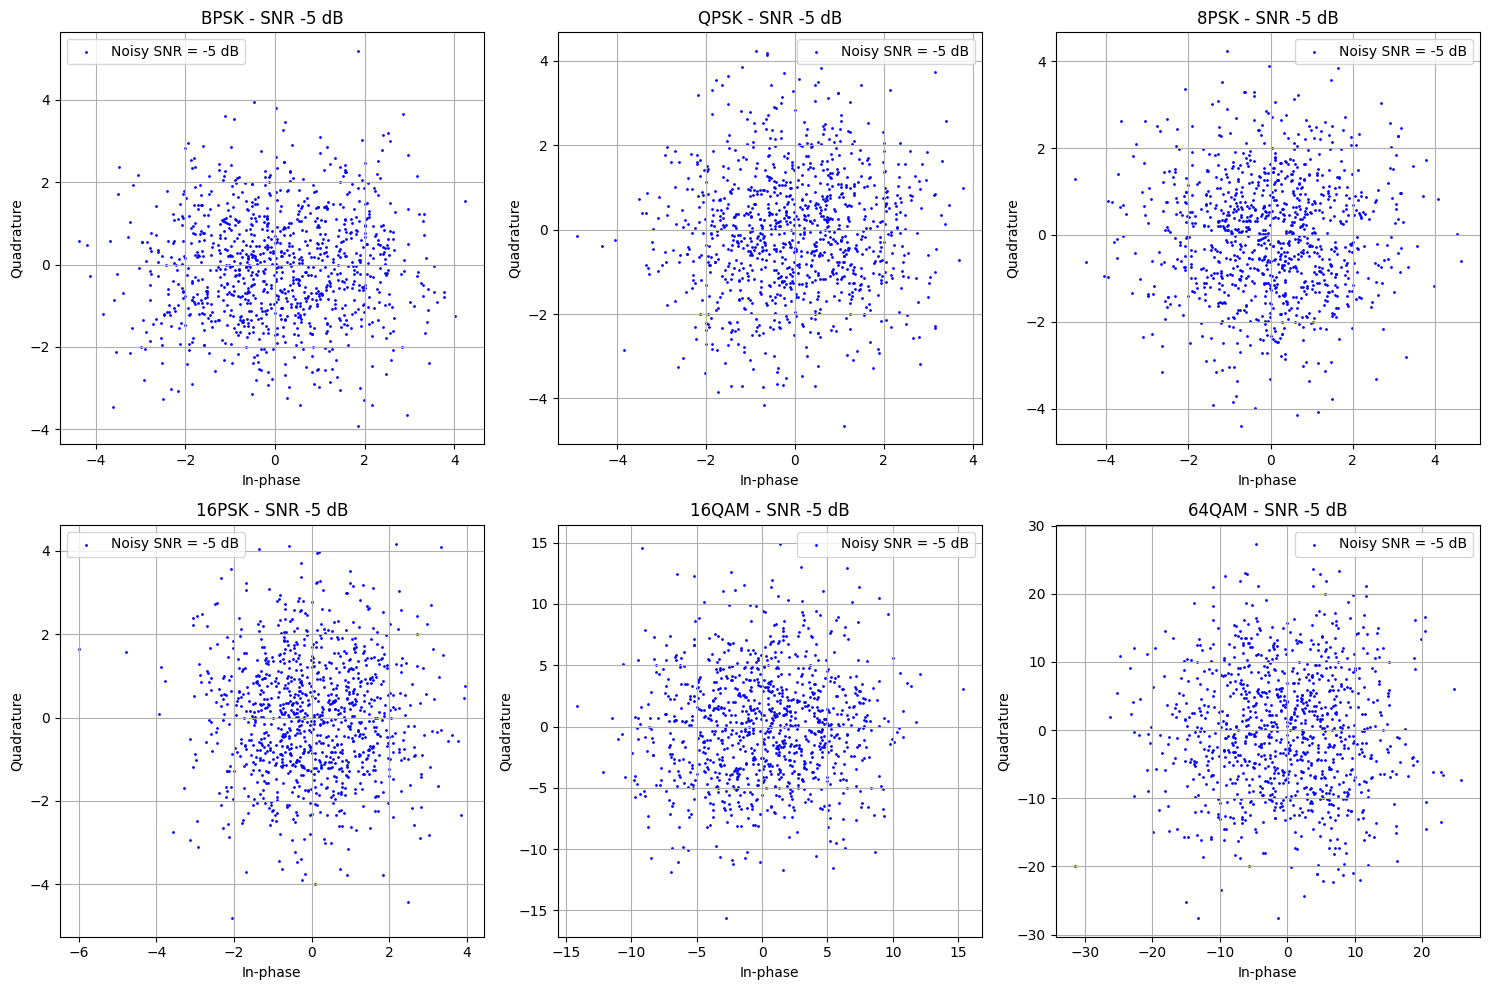

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Función para añadir ruido a la señal
def add_noise(signal, snr_db):
    snr_linear = 10**(snr_db / 10.0)
    signal_power = np.mean(np.abs(signal)**2)
    noise_power = signal_power / snr_linear
    noise = np.sqrt(noise_power / 2) * (np.random.randn(len(signal)) + 1j * np.random.randn(len(signal)))
    return signal + noise

# Función para generar diferentes modulaciones
def modulate_psk(M, num_symbols):
    symbols = np.arange(M)
    angles = 2 * np.pi * symbols / M
    signal = np.exp(1j * angles)
    indices = np.random.randint(0, M, num_symbols)
    return signal[indices]

def modulate_qam(M, num_symbols):
    m = int(np.sqrt(M))
    real = np.repeat(np.arange(-m+1, m, 2), m)
    imag = np.tile(np.arange(-m+1, m, 2), m)
    signal = real + 1j * imag
    indices = np.random.randint(0, M, num_symbols)
    return signal[indices]

# Parámetros
num_symbols = 1000
snr_levels = [20, 10, 5, 0, -5]  # en dB
modulations = ['BPSK', 'QPSK', '8PSK', '16PSK', '16QAM', '64QAM']

# Crear una figura para cada nivel de ruido
for snr_db in snr_levels:
    plt.figure(figsize=(15, 10))

    for i, modulation in enumerate(modulations):
        plt.subplot(2, 3, i+1)

        if modulation == 'BPSK':
            modulated_signal = modulate_psk(2, num_symbols)
        elif modulation == 'QPSK':
            modulated_signal= modulate_psk(4, num_symbols)
        elif modulation == '8PSK':
            modulated_signal= modulate_psk(8, num_symbols)
        elif modulation == '16PSK':
            modulated_signal = modulate_psk(16, num_symbols)
        elif modulation == '16QAM':
            modulated_signal = modulate_qam(16, num_symbols)
        elif modulation == '64QAM':
            modulated_signal = modulate_qam(64, num_symbols)

        # Añadir ruido
        noisy_signal = add_noise(modulated_signal, snr_db)

        # Graficar señal con ruido
        plt.scatter(noisy_signal.real, noisy_signal.imag, label=f'Noisy SNR = {snr_db} dB', s=1, color='blue')


        # Configuración de la gráfica
        plt.title(f'{modulation} - SNR {snr_db} dB')
        plt.xlabel('In-phase')
        plt.ylabel('Quadrature')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()